## Import the libraries

In [48]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Load the data

In [30]:
data = pd.read_csv('California_Real_Estate.csv', sep=';')
df = data.copy()
df

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1,2005.0,11.0,0,30.0,743,246173,1
1,1,2005.0,10.0,0,29.0,756,246332,1
2,2,2007.0,7.0,0,2.0,587,209281,1
3,2,2007.0,12.0,0,31.0,1605,452667,1
4,1,2004.0,11.0,0,49.0,1375,467083,1
...,...,...,...,...,...,...,...,...
262,5,NaN,NaN,0,NaN,1239,322611,0
263,5,NaN,NaN,0,NaN,795,279191,0
264,5,NaN,NaN,0,NaN,1013,287997,0
265,5,NaN,NaN,0,NaN,1075,365869,0


In [31]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Building          267 non-null    int64  
 1   Year of sale      195 non-null    float64
 2   Month of sale     195 non-null    float64
 3   Type of property  267 non-null    int64  
 4   Property #        207 non-null    float64
 5   Area (ft.)        267 non-null    int64  
 6   Price             267 non-null    int64  
 7   Status            267 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 16.8 KB


In [32]:
# Check for duplicates
df.duplicated().sum()

0

## Discard the NaN values

In [33]:
# Drop null rows
df_nonull = df.dropna()
df_nonull

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1,2005.0,11.0,0,30.0,743,246173,1
1,1,2005.0,10.0,0,29.0,756,246332,1
2,2,2007.0,7.0,0,2.0,587,209281,1
3,2,2007.0,12.0,0,31.0,1605,452667,1
4,1,2004.0,11.0,0,49.0,1375,467083,1
...,...,...,...,...,...,...,...,...
191,1,2005.0,7.0,0,22.0,743,210745,1
192,1,2005.0,7.0,0,28.0,1160,331155,1
193,1,2005.0,7.0,0,34.0,626,204435,1
194,1,2005.0,7.0,0,37.0,756,189194,1


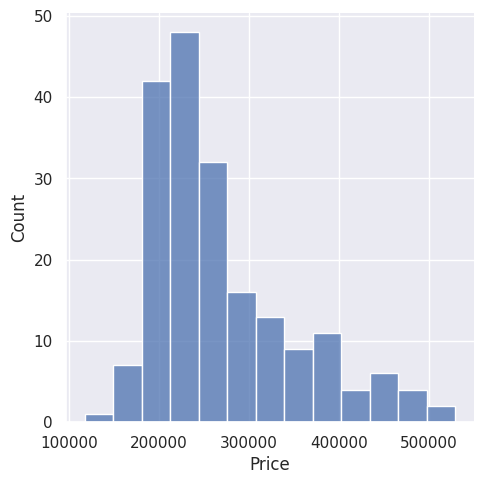

In [35]:
# Check distribution
sns.displot(df_nonull['Price'])
plt.show()

In [34]:
# Calculate the correlation matrix
correlation_matrix = df_nonull.corr()

# Find the correlation of each variable with 'Price'
price_correlations = correlation_matrix['Price']
price_correlations

Building           -0.085341
Year of sale       -0.012964
Month of sale      -0.031861
Type of property   -0.039164
Property #          0.305296
Area (ft.)          0.941211
Price               1.000000
Status                   NaN
Name: Price, dtype: float64

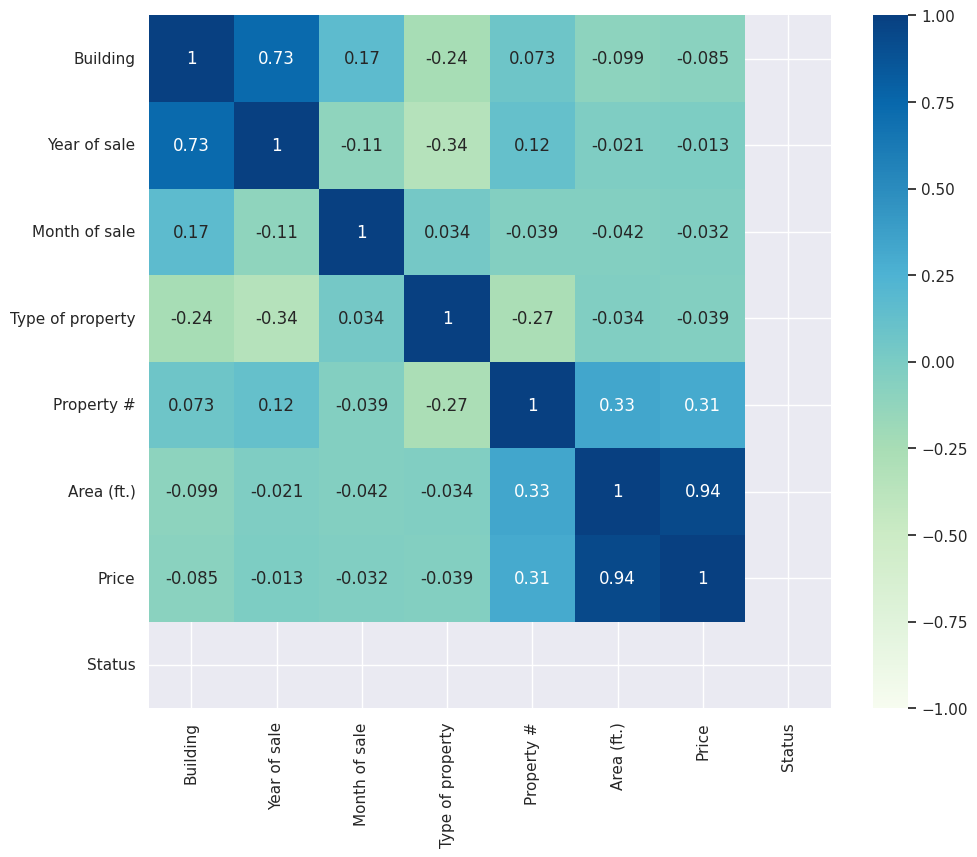

In [36]:
# Check for multicolinearity
plt.figure(figsize=(11,9))
sns.heatmap(correlation_matrix,
            vmin = -1,
            vmax = 1,
            cmap ="GnBu",
            annot=True)
plt.show()

In [41]:

X = df_nonull.drop('Price', axis = 1)
y = df_nonull['Price']

In [42]:
# Split the data into independent (X) and dependent (y) variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Standardize the training and test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Define the cross-validation procedure with specific values
cv = RepeatedKFold(n_splits=8, n_repeats=3, random_state=1)

# Initialize the RidgeCV model with the range of alpha values
ridge_cv = RidgeCV(alphas=np.arange(0.1, 10.1, 0.1), cv=cv)

# Fit the RidgeCV model to the training data
ridge_cv.fit(X_train, y_train)

# Find the best alpha value
best_alpha = ridge_cv.alpha_

# Create the Ridge regression model with the best alpha
ridge = Ridge(alpha=best_alpha)

# Fit the Ridge model to the training data
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge.predict(X_test)

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE and the best alpha value
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Best alpha for Ridge Regression: {best_alpha:.2f}")

Root Mean Squared Error (RMSE): 24664.77
Best alpha for Ridge Regression: 1.30


In [49]:
# Define the cross-validation procedure with specific values
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

# Initialize RidgeCV and LassoCV models with the specified alpha range and cross-validator
ridge_cv = RidgeCV(alphas=np.arange(0.1, 10.1, 0.1), cv=cv, scoring='neg_mean_absolute_error')
lasso_cv = LassoCV(alphas=np.arange(0.1, 10.1, 0.1), cv=cv)

# Fit the RidgeCV and LassoCV models to the training data
ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)

# Find the best alpha values
best_alpha_ridge = ridge_cv.alpha_
best_alpha_lasso = lasso_cv.alpha_

# Create Ridge and Lasso models with the best alphas
ridge = Ridge(alpha=best_alpha_ridge)
lasso = Lasso(alpha=best_alpha_lasso)

# Fit the Ridge and Lasso models to the training data
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predict on the test set for Ridge and Lasso
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Calculate RMSE for Ridge and Lasso
rmse_ridge = math.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_lasso = math.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Print the RMSE values for Ridge and Lasso
print(f"Ridge RMSE: {rmse_ridge:.0f}; Lasso RMSE: {rmse_lasso:.0f}")


Ridge RMSE: 24672; Lasso RMSE: 24664


In [50]:
# Designate the target variable
y_year = df_nonull['Year of sale']

# Split the data into training and testing sets
X_train, X_test, y_train_year, y_test_year = train_test_split(X, y_year, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train_year = scaler.fit_transform(X_train)
x_test_year = scaler.transform(X_test)

# Initialize the Lasso model
lasso = Lasso(alpha=0.1)

# Fit the Lasso model to the training data
lasso.fit(x_train_year, y_train_year)

# Predict the 'Year of sale'
y_pred_year = lasso.predict(x_test_year)

# Round the results to obtain predicted year values
predicted_years = np.round_(y_pred_year)

# Print the first 5 predicted year values
print(predicted_years[:5])

[2005. 2006. 2007. 2007. 2007.]
